## import 해올것들

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score,confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
import warnings
import time

warnings.filterwarnings('ignore')
%matplotlib inline

## 정밀도, 재현율 그림 함수

In [2]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

## string 값 인코딩 함수

In [3]:
def encode_features(dataDF):
    features = test_df_dropna.columns
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

In [4]:
test_df = pd.read_csv('./adult.data_converted.csv')
test_df.drop(32561, axis=0, inplace=True)

In [5]:
test_df.head(10)

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_more_than_50K
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0.0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0.0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0.0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0.0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0.0
5,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,0.0
6,49.0,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,0.0
7,52.0,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,1.0
8,31.0,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,1.0
9,42.0,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,1.0


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               32561 non-null  float64
 1   work-class        32561 non-null  object 
 2   fnlwgt            32561 non-null  float64
 3   education         32561 non-null  object 
 4   education-num     32561 non-null  float64
 5   marital-status    32561 non-null  object 
 6   occupation        32561 non-null  object 
 7   relationship      32561 non-null  object 
 8   race              32561 non-null  object 
 9   sex               32561 non-null  object 
 10  capital-gain      32561 non-null  float64
 11  capital-loss      32561 non-null  float64
 12  hours-per-week    32561 non-null  float64
 13  native-country    32561 non-null  object 
 14  is_more_than_50K  32561 non-null  float64
dtypes: float64(7), object(8)
memory usage: 4.0+ MB


In [7]:
print('데이터 세트 Null 값 갯수 \n',test_df.isnull().sum()) #이 csv파일에는 ?를 널로 안바꿔서 널값이 없습니다.

데이터 세트 Null 값 갯수 
 age                 0
work-class          0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
is_more_than_50K    0
dtype: int64


In [8]:
test_df_dropna = test_df#.dropna(axis = 0)

## 각 칼럼별 50K이상인 사람 히스토그램

### <li>나이

<AxesSubplot:xlabel='age', ylabel='is_more_than_50K'>

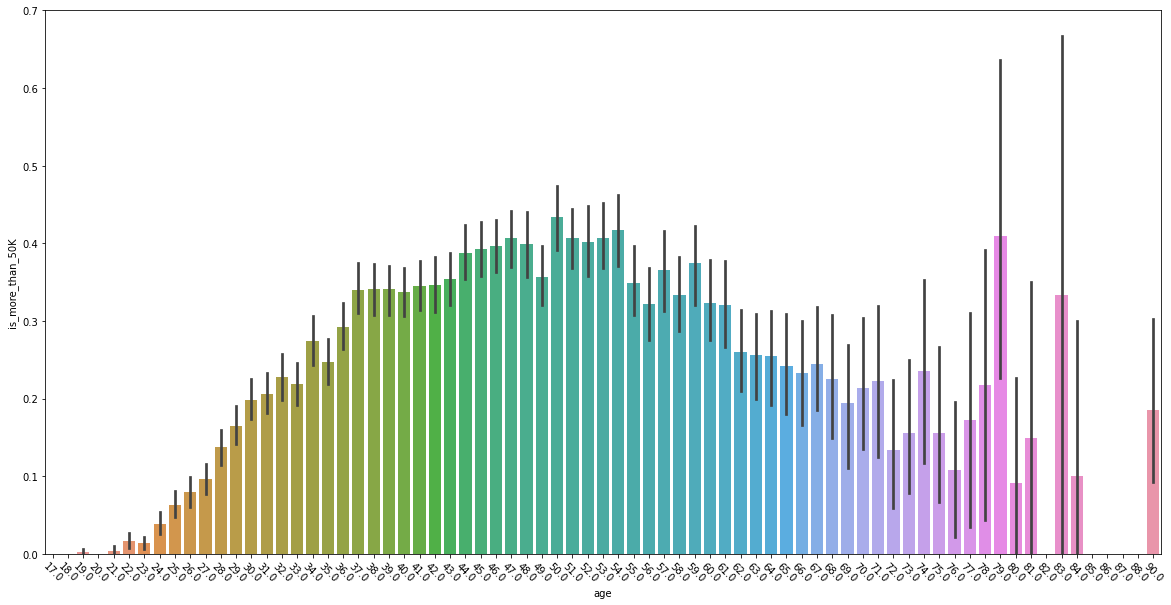

In [9]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation = - 45 )
sns.barplot(x='age', y = 'is_more_than_50K', data=test_df_dropna)

### <li>직종

<AxesSubplot:xlabel='work-class', ylabel='is_more_than_50K'>

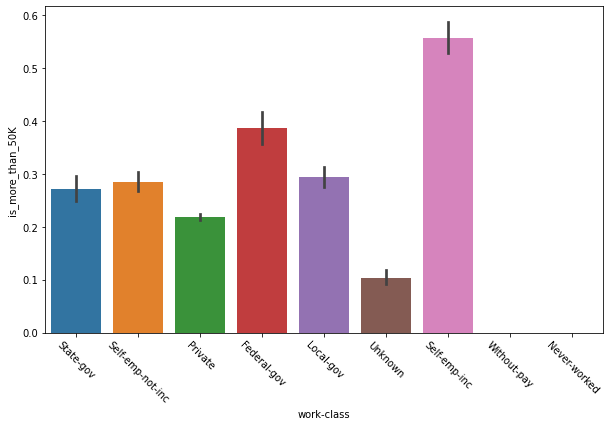

In [10]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45 )
sns.barplot(x='work-class', y = 'is_more_than_50K', data=test_df_dropna)

### <li>교육

<AxesSubplot:xlabel='education-num', ylabel='is_more_than_50K'>

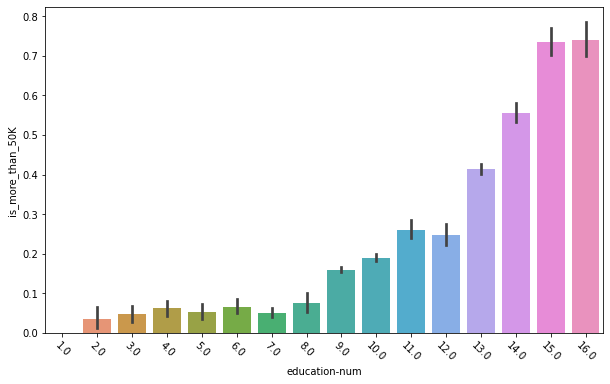

In [11]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45)
sns.barplot(x='education-num', y = 'is_more_than_50K', data=test_df_dropna)

### <li>결혼여부

<AxesSubplot:xlabel='marital-status', ylabel='is_more_than_50K'>

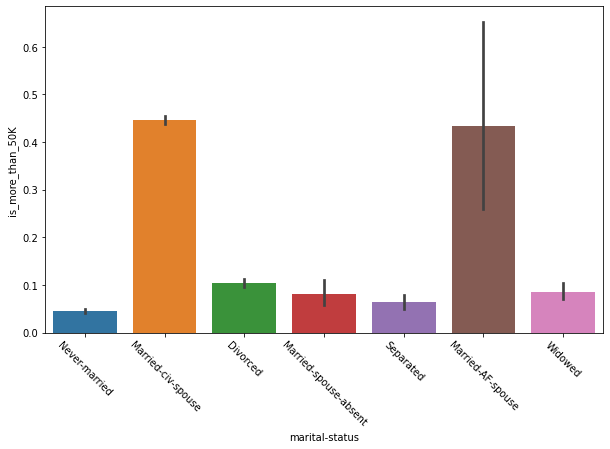

In [12]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45 )
sns.barplot(x='marital-status', y = 'is_more_than_50K', data=test_df_dropna)

### <li>직업

<AxesSubplot:xlabel='occupation', ylabel='is_more_than_50K'>

<Figure size 720x432 with 0 Axes>

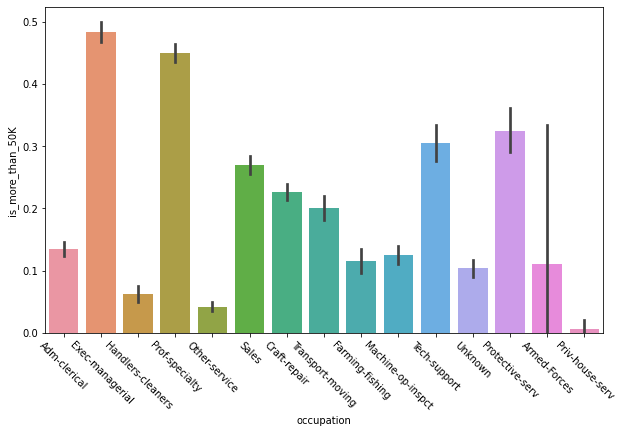

In [13]:
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45)
sns.barplot(x='occupation', y = 'is_more_than_50K', data=test_df_dropna)

### <li>가족관계

<AxesSubplot:xlabel='relationship', ylabel='is_more_than_50K'>

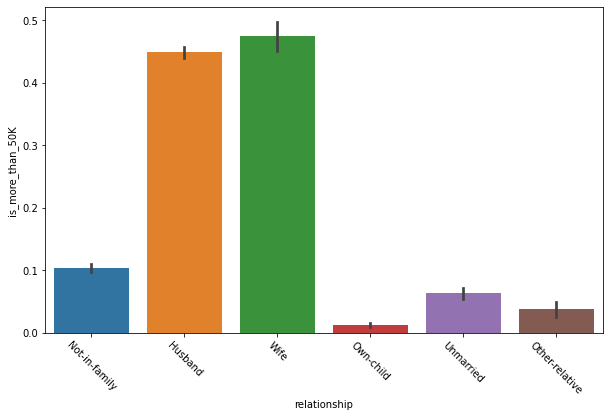

In [14]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45 )
sns.barplot(x='relationship', y = 'is_more_than_50K', data=test_df_dropna)

### <li>인종

<AxesSubplot:xlabel='race', ylabel='is_more_than_50K'>

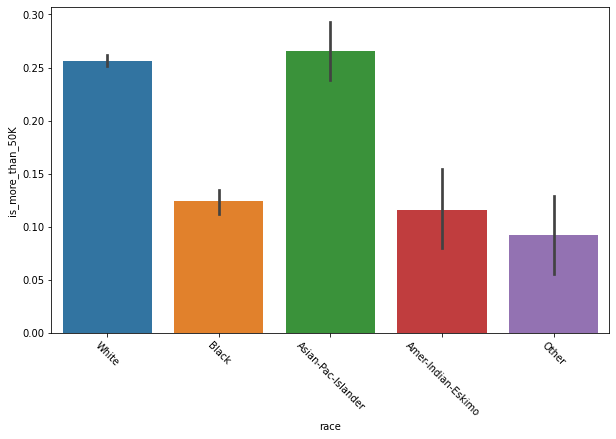

In [15]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45 )
sns.barplot(x='race', y = 'is_more_than_50K', data=test_df_dropna)

### <li>성별

<AxesSubplot:xlabel='sex', ylabel='is_more_than_50K'>

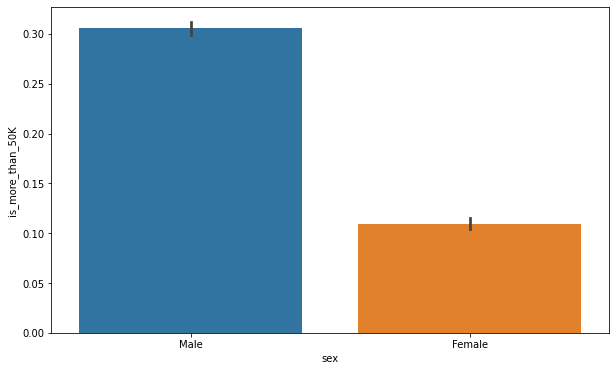

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y = 'is_more_than_50K', data=test_df_dropna)

### <li>주간 업무량

<AxesSubplot:xlabel='hours-per-week', ylabel='is_more_than_50K'>

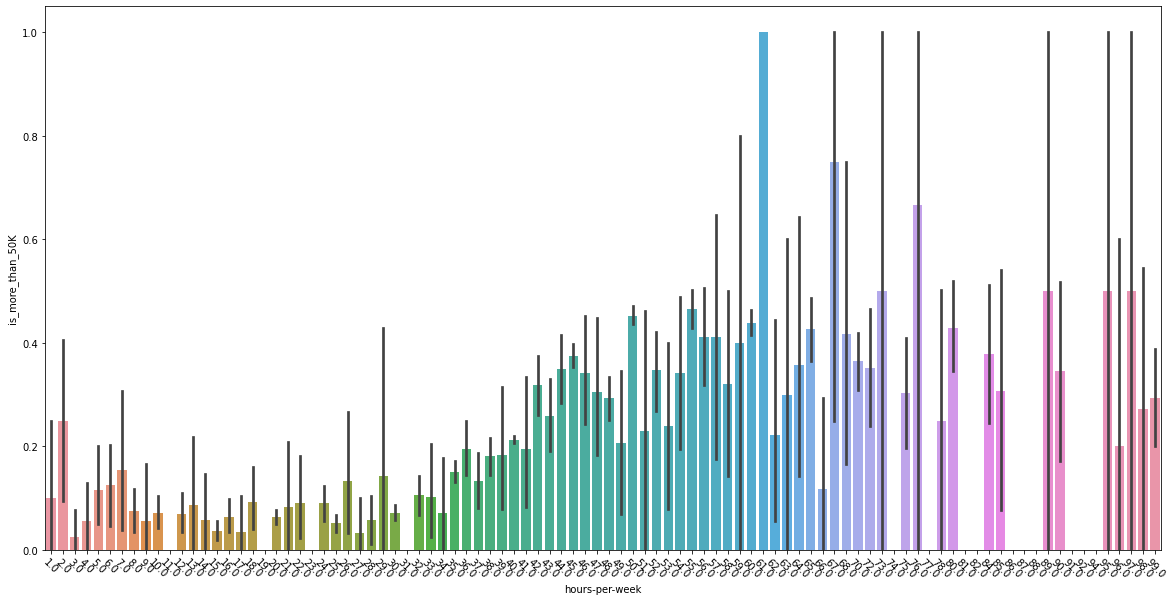

In [17]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation = - 45 )
sns.barplot(x='hours-per-week', y = 'is_more_than_50K', data=test_df_dropna)

### <li>국적

<AxesSubplot:xlabel='native-country', ylabel='is_more_than_50K'>

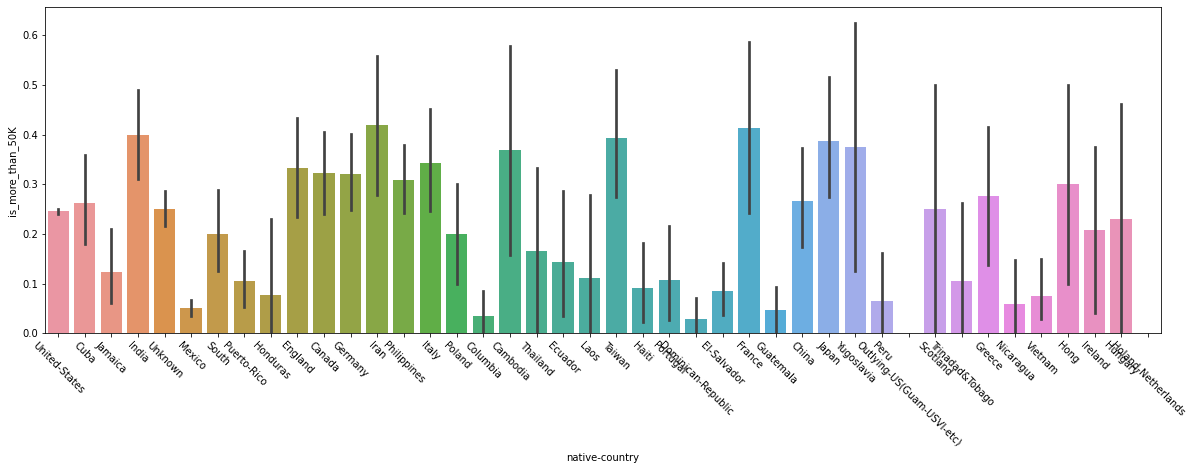

In [18]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation = - 45)
sns.barplot(x='native-country', y = 'is_more_than_50K', data=test_df_dropna)

In [19]:
test_df.drop(['education','native-country','fnlwgt','sex','work-class','race'], axis=1, inplace=True) #3개의 칼럼 제거

In [20]:
print('데이터 세트 Null 값 갯수 \n',test_df_dropna.isnull().sum())

데이터 세트 Null 값 갯수 
 age                 0
education-num       0
marital-status      0
occupation          0
relationship        0
capital-gain        0
capital-loss        0
hours-per-week      0
is_more_than_50K    0
dtype: int64


In [21]:
test_df_dropna.head(10)

,age,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,is_more_than_50K
0,39.0,13.0,Never-married,Adm-clerical,Not-in-family,2174.0,0.0,40.0,0.0
1,50.0,13.0,Married-civ-spouse,Exec-managerial,Husband,0.0,0.0,13.0,0.0
2,38.0,9.0,Divorced,Handlers-cleaners,Not-in-family,0.0,0.0,40.0,0.0
3,53.0,7.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,40.0,0.0
4,28.0,13.0,Married-civ-spouse,Prof-specialty,Wife,0.0,0.0,40.0,0.0
5,37.0,14.0,Married-civ-spouse,Exec-managerial,Wife,0.0,0.0,40.0,0.0
6,49.0,5.0,Married-spouse-absent,Other-service,Not-in-family,0.0,0.0,16.0,0.0
7,52.0,9.0,Married-civ-spouse,Exec-managerial,Husband,0.0,0.0,45.0,1.0
8,31.0,14.0,Never-married,Prof-specialty,Not-in-family,14084.0,0.0,50.0,1.0
9,42.0,13.0,Married-civ-spouse,Exec-managerial,Husband,5178.0,0.0,40.0,1.0


In [22]:
test_df_dropna = encode_features(test_df_dropna)
test_df_dropna.head(10)

,age,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,is_more_than_50K
0,22,12,4,0,1,25,0,39,0
1,33,12,2,3,0,0,0,12,0
2,21,8,0,5,1,0,0,39,0
3,36,6,2,5,0,0,0,39,0
4,11,12,2,9,5,0,0,39,0
5,20,13,2,3,5,0,0,39,0
6,32,4,3,7,1,0,0,15,0
7,35,8,2,3,0,0,0,44,1
8,14,13,4,9,1,105,0,49,1
9,25,12,2,3,0,79,0,39,1


In [23]:
test_df_dropna.head(10)

,age,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,is_more_than_50K
0,22,12,4,0,1,25,0,39,0
1,33,12,2,3,0,0,0,12,0
2,21,8,0,5,1,0,0,39,0
3,36,6,2,5,0,0,0,39,0
4,11,12,2,9,5,0,0,39,0
5,20,13,2,3,5,0,0,39,0
6,32,4,3,7,1,0,0,15,0
7,35,8,2,3,0,0,0,44,1
8,14,13,4,9,1,105,0,49,1
9,25,12,2,3,0,79,0,39,1


In [24]:
y_test_df = test_df_dropna['is_more_than_50K']
X_test_df= test_df_dropna.drop('is_more_than_50K',axis=1)

In [25]:
y_test_df.head()

0    0
1    0
2    0
3    0
4    0
Name: is_more_than_50K, dtype: int64

In [26]:
X_test_df.head()

,age,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week
0,22,12,4,0,1,25,0,39
1,33,12,2,3,0,0,0,12
2,21,8,0,5,1,0,0,39
3,36,6,2,5,0,0,0,39
4,11,12,2,9,5,0,0,39


In [27]:
X_train, X_test, y_train, y_test=train_test_split(X_test_df, y_test_df, test_size=0.3, random_state=12)

## 예측

### 별 다른 파라미터 설정 없이 그냥 학습, 예측

In [28]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('DecisionTreeClassifier 정밀도: {0:.4f}'.format(precision_score(y_test, dt_pred)))
print('DecisionTreeClassifier 재현도: {0:.4f}'.format(recall_score(y_test, dt_pred)))
print('DecisionTreeClassifier f1스코어: {0:.4f}'.format(f1_score(y_test, dt_pred)))
print()

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('RandomForestClassifier 정밀도: {0:.4f}'.format(precision_score(y_test, rf_pred)))
print('RandomForestClassifier 재현도: {0:.4f}'.format(recall_score(y_test, rf_pred)))
print('RandomForestClassifier f1스코어: {0:.4f}'.format(f1_score(y_test, rf_pred)))
print()

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('LogisticRegression 정밀도: {0:.4f}'.format(precision_score(y_test, lr_pred)))
print('LogisticRegression 재현도: {0:.4f}'.format(recall_score(y_test, lr_pred)))
print('LogisticRegression f1스코어: {0:.4f}'.format(f1_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.8218
DecisionTreeClassifier 정밀도: 0.6414
DecisionTreeClassifier 재현도: 0.6049
DecisionTreeClassifier f1스코어: 0.6226

RandomForestClassifier 정확도:0.8438
RandomForestClassifier 정밀도: 0.7060
RandomForestClassifier 재현도: 0.6120
RandomForestClassifier f1스코어: 0.6557

LogisticRegression 정확도: 0.8220
LogisticRegression 정밀도: 0.7115
LogisticRegression 재현도: 0.4499
LogisticRegression f1스코어: 0.5512


## Decision Tree

### <li>최적 파라미터 탐색

In [29]:
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,2,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
GridSearchCV 최고 정확도: 0.8539
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8527


### <li>수형도 그리기

In [30]:
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(best_dclf,out_file="tree.dot", max_depth=4, impurity=True, filled=True, 
                feature_names = X_test_df.columns, rounded=True) # 박스의 모양을 둥글게

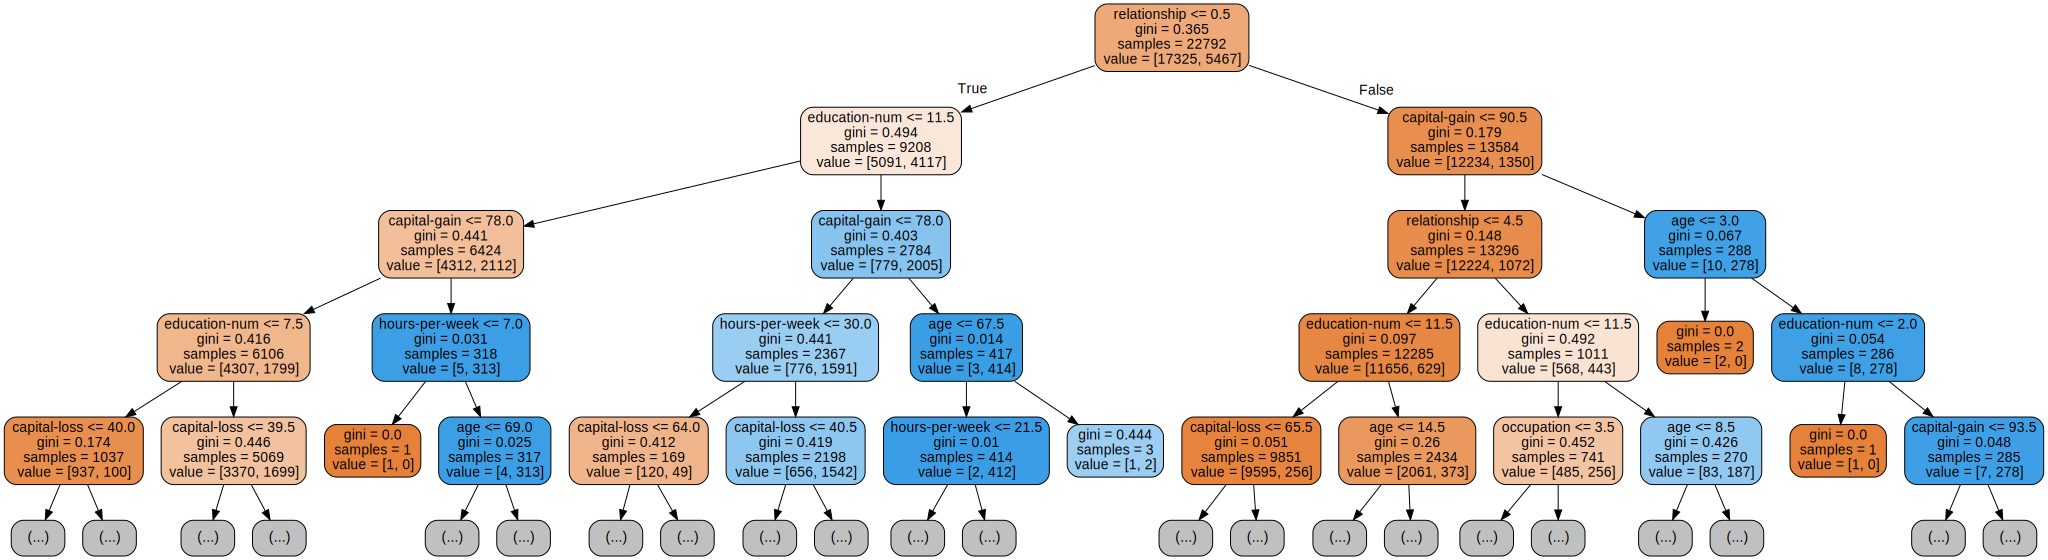

In [31]:
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### <li>각 파라미터의 정밀도 재현율 그래프

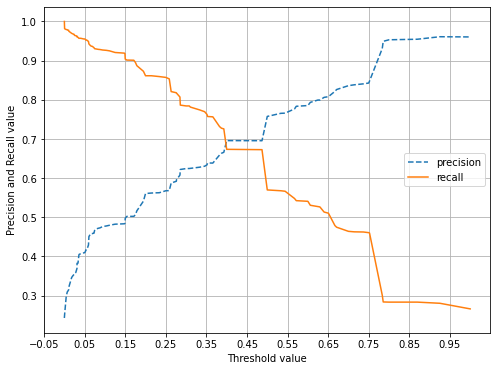

In [32]:
pred_proba_c1 = grid_dclf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

### <li>최적 파라미터 예측 점수

In [33]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dclf.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('예측 정확도: {0:.5f}'.format(accuracy_score(y_test,pred)))
print('예측 정밀도: {0:.5f}'.format(precision_score(y_test,pred)))
print('예측 재현율: {0:.5f}'.format(recall_score(y_test,pred)))
print('예측 f1스코어: {0:.5f}'.format(f1_score(y_test,pred)))
print('예측 roc_auc_스코어: {0:.5f}'.format(roc_auc_score(y_test,pred)))

예측 정확도: 0.85270
예측 정밀도: 0.76547
예측 재현율: 0.56782
예측 f1스코어: 0.65200
예측 roc_auc_스코어: 0.75598


### <li>최적 파라미터 특징 중요도

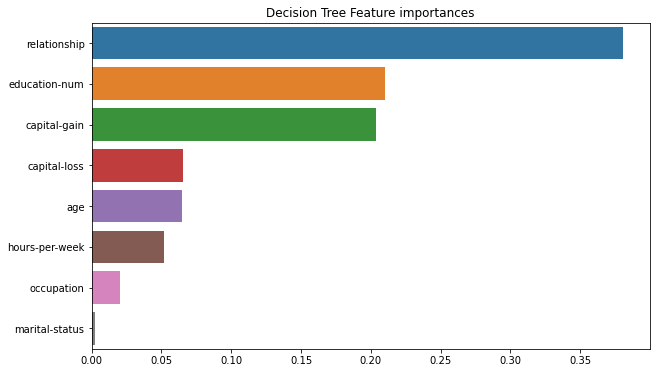

In [34]:
ftr_importances_values = estimator.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.title('Decision Tree Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

## Random Forest

### <li>최적 파라미터 탐색

In [35]:
params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
estimator = grid_cv.best_estimator_

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.8587


### <li>수형도 그리기

In [36]:
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(estimator[0], out_file='tree2.dot', 
                feature_names = X_test_df.columns,
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

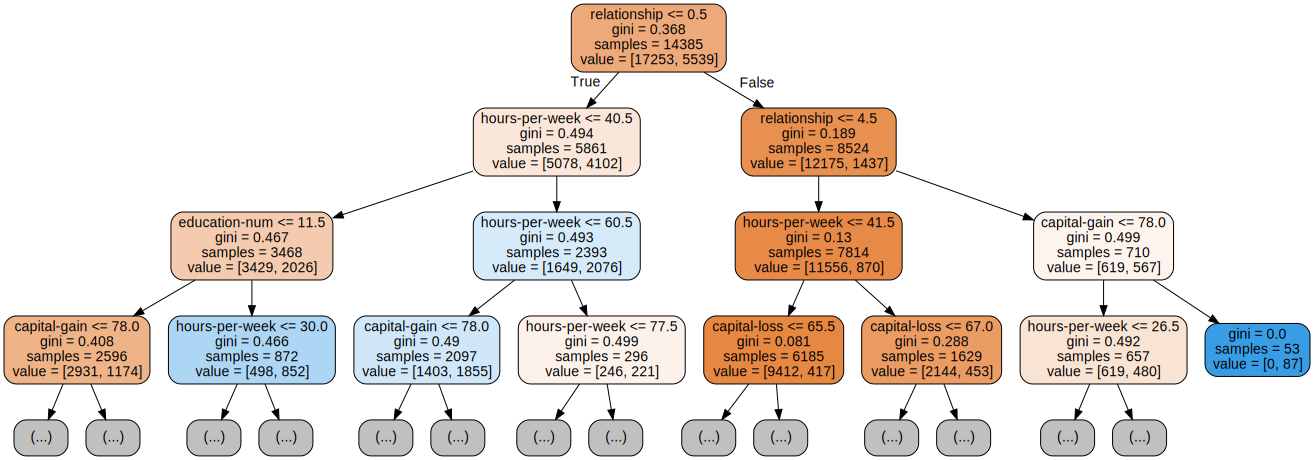

In [37]:
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### <li>각 파라미터의 정밀도 재현율 그래프

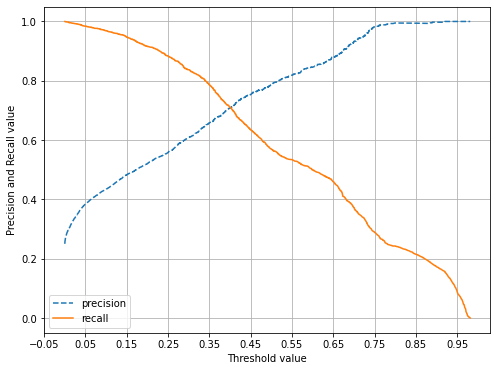

In [38]:
pred_proba_c1 = grid_cv.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

### <li>최적 파라미터 예측 점수

In [39]:
### <li>최적 파라미터 예측 점수# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))
print('예측 정밀도: {0:.5f}'.format(precision_score(y_test,pred)))
print('예측 재현율: {0:.5f}'.format(recall_score(y_test,pred)))
print('예측 f1스코어: {0:.5f}'.format(f1_score(y_test,pred)))
print('예측 roc_auc_스코어: {0:.5f}'.format(roc_auc_score(y_test,pred)))

예측 정확도: 0.8578
예측 정밀도: 0.78584
예측 재현율: 0.57035
예측 f1스코어: 0.66097
예측 roc_auc_스코어: 0.76022


### <li>최적 파라미터 특징 중요도

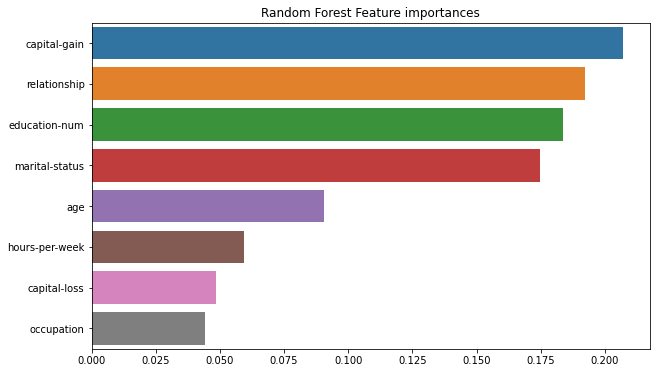

In [40]:
ftr_importances_values = estimator.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.title('Random Forest Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

## Gradient Boost

### <li>최적 파라미터 탐색

In [41]:
warnings.filterwarnings('ignore')
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('예측 정확도: {0:.4f}'.format(gb_accuracy))
print('수행시간: {0:.4f}s'.format(time.time() - start_time))

예측 정확도: 0.8654
수행시간: 1.1368s


### <li>최적 파라미터 예측 점수

In [42]:
params = {
    'n_estimators':[100,200,300,500],
    'learning_rate':[0.05,0.1,0.2]
}
start_time = time.time()
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2, verbose=1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
print('수행시간: {0:.4f}s'.format(time.time() - start_time))

Fitting 2 folds for each of 12 candidates, totalling 24 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 300}
최고 예측 정확도: 0.8674
수행시간: 40.9773s


### <li>각 파라미터의 정밀도 재현율 그래프

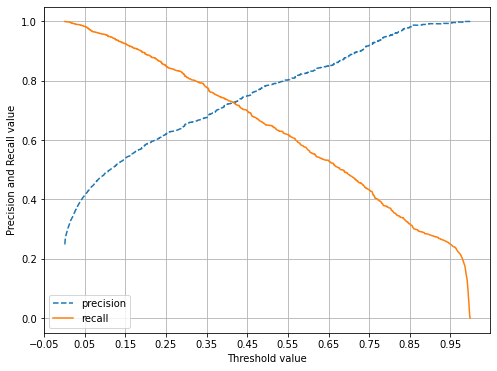

In [43]:
pred_proba_c1 = grid_cv.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [44]:
estimator = grid_cv.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))
print('예측 정밀도: {0:.5f}'.format(precision_score(y_test,pred)))
print('예측 재현율: {0:.5f}'.format(recall_score(y_test,pred)))
print('예측 f1스코어: {0:.5f}'.format(f1_score(y_test,pred)))
print('예측 roc_auc_스코어: {0:.5f}'.format(roc_auc_score(y_test,pred)))

예측 정확도: 0.8716
예측 정밀도: 0.78455
예측 재현율: 0.65038
예측 f1스코어: 0.71119
예측 roc_auc_스코어: 0.79652


### <li>최적 파라미터 특징 중요도

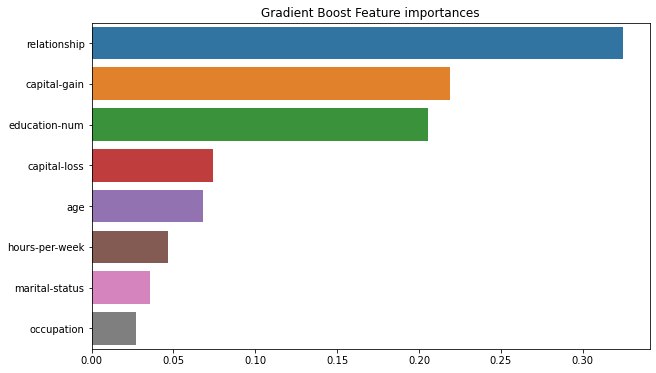

In [45]:
ftr_importances_values = estimator.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.title('Gradient Boost Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

## Logistic Regression

In [46]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.822
roc_auc: 0.696


### <li>최적 파라미터 탐색

In [47]:
params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(X_train , y_train)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))
estimator = grid_clf.best_estimator_

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.822


### <li>각 파라미터의 정밀도 재현율 그래프

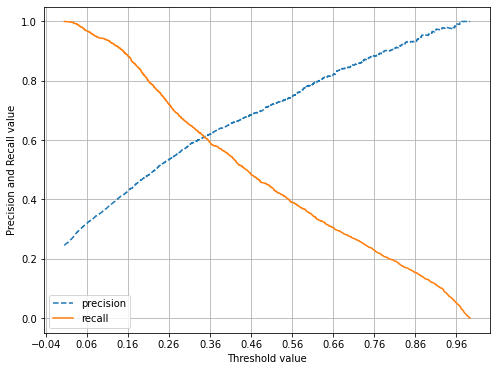

In [48]:
pred_proba_c1 = grid_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

### <li>최적 파라미터 예측 점수

In [49]:
# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))
print('예측 정밀도: {0:.5f}'.format(precision_score(y_test,pred)))
print('예측 재현율: {0:.5f}'.format(recall_score(y_test,pred)))
print('예측 f1스코어: {0:.5f}'.format(f1_score(y_test,pred)))
print('예측 roc_auc_스코어: {0:.5f}'.format(roc_auc_score(y_test,pred)))

예측 정확도: 0.8220
예측 정밀도: 0.71153
예측 재현율: 0.44987
예측 f1스코어: 0.55123
예측 roc_auc_스코어: 0.69566
